## Auto Encoders

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names

# Scaling the data
scaler = MinMaxScaler() #using that min,max formula for normalization
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [ ]:
print(target_names)
print(X_scaled[0])

['setosa' 'versicolor' 'virginica']
[0.22222222 0.625      0.06779661 0.04166667]


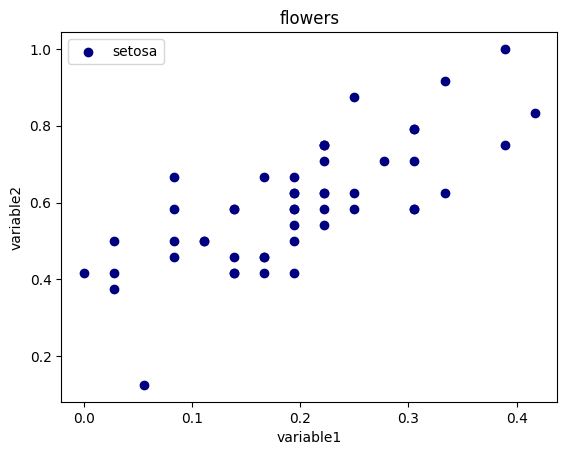

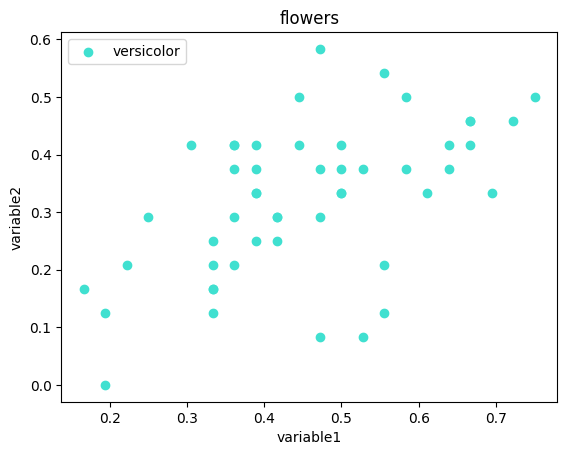

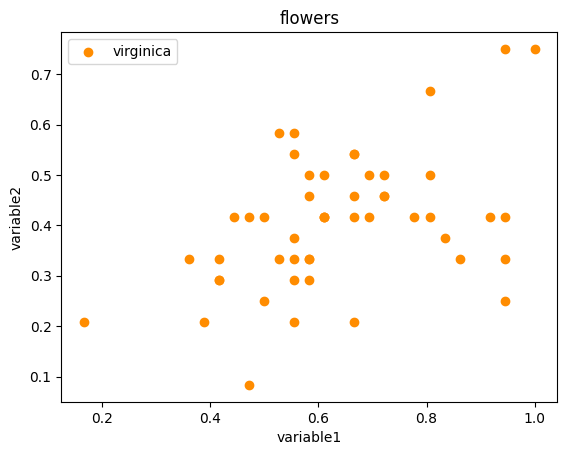

In [ ]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()
plot3clusters(X_scaled,'flowers','variable')

In [ ]:
input_dim = X_scaled.shape[1]
encoding_dim = 3 #no of neurons
inputLayer = Input(input_dim)
encoded = Dense(encoding_dim,'linear')(inputLayer)
decoded = Dense(input_dim,activation='linear')(encoded)
autoencoder = Model(inputLayer,decoded)
autoencoder.compile('Adam',loss='mse')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


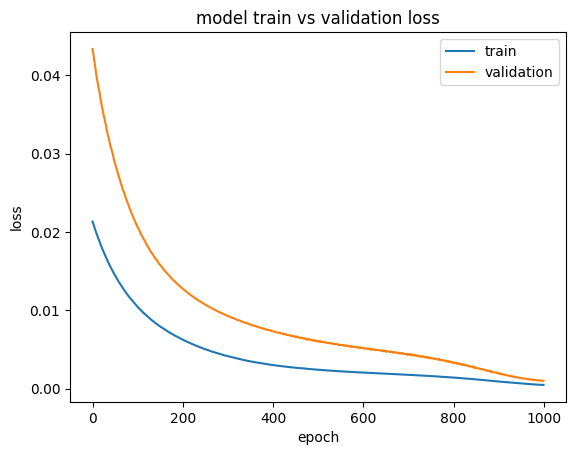

In [ ]:
# "encoded" representation of the input
# encoded = None

# # "decoded" lossy reconstruction of the input
# decoded = None

# # Map an input to reconstruction
# autoencoder = None

history = autoencoder.fit(X_scaled,X_scaled,epochs=1000,batch_size=16,shuffle=True,validation_split=0.25,verbose=0)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()
# Use the encoded layer to encode the training input


5/5 [==============================] - 0s 2ms/step


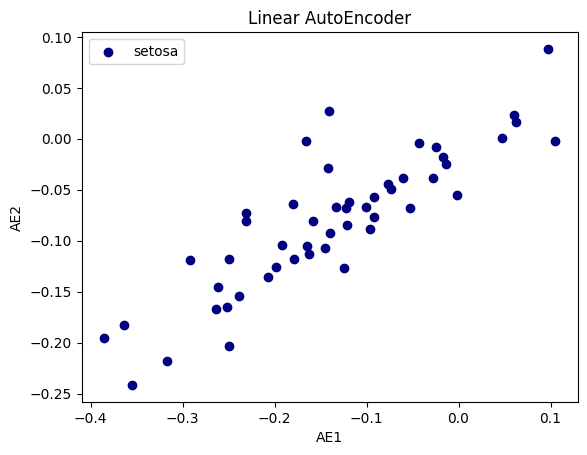

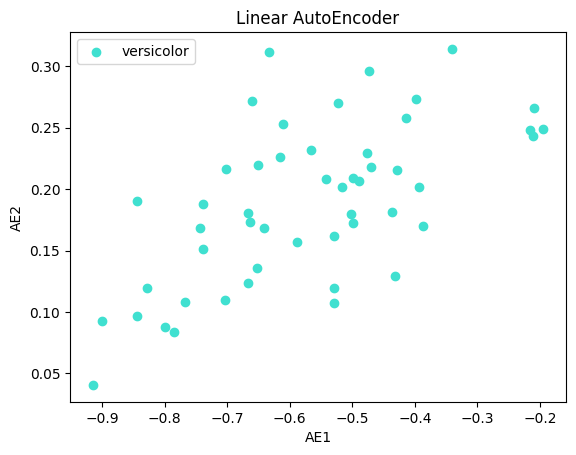

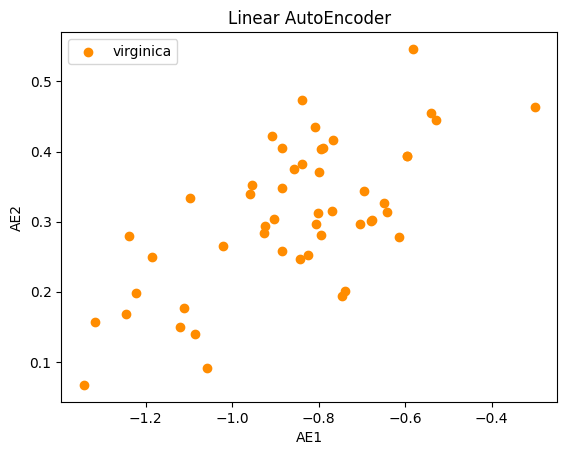

In [ ]:
encoder = Model(inputLayer,encoded)
encoded_input = Input(encoding_dim)
decoderLayer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoderLayer(encoded_input))
encoded_data = encoder.predict(X_scaled)
plot3clusters(encoded_data,'Linear AutoEncoder','AE')